In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import plotly.express as px

In [4]:
df = pd.read_excel(".\Data\Exam Stress Final.xlsx",sheet_name=None)
grades=df['Grades']
demography=df['Demography']
eda=df['EDA']
hr=df['HR']
temp=df['Temp']
ibi=df['IBI']


# Addtional Queries :

# Q1. How do the midterm grades (Midterm1, Midterm2) correlate with the final grades?

In [38]:
import pandas as pd

# Assuming 'grades_data' is your DataFrame containing Midterm1, Midterm2, and Final grades
correlation_matrix = grades[['Midterm 1', 'Midterm 2', 'final']].corr()

# Correlation between Midterm1 and Final grades
correlation_midterm1_final = correlation_matrix.loc['Midterm 1', 'final']

# Correlation between Midterm2 and Final grades
correlation_midterm2_final = correlation_matrix.loc['Midterm 2', 'final']

print(f"Correlation between Midterm1 and Final grades: {correlation_midterm1_final:.2f}")
print(f"Correlation between Midterm2 and Final grades: {correlation_midterm2_final:.2f}")


Correlation between Midterm1 and Final grades: 0.20
Correlation between Midterm2 and Final grades: 0.84


# Q2. Count the students who are in the Race group Asian

In [4]:
df = pd.read_excel(".\Data\Exam Stress Final.xlsx", sheet_name='Demography')
count = len(df[df['Race'] == 'Asian'])
print("Students in Race group white count is:", count)

Students in Race group white count is: 2


# Q3. Display the student Names and respective grades who has Minimum heart rate

In [5]:
#Merge Demo and Grades sets
Student_demo_grade_df = pd.merge(demography[['Student_id', 'First Name', 'Last Name','DOB']],
                                 grades[['Student_id','Midterm 1','Midterm 2','final']],
                                 on='Student_id',
                                 how='inner')
# Merge Results of merge of Demo and grades to HR
Student_HR_df = pd.merge(Student_demo_grade_df[['Student_id', 'First Name', 'Last Name','Midterm 1','Midterm 2','final']],
                        hr[['Student_id','HR',]],
                        on='Student_id',
                        how='inner')
# grouping of student id and  other common columns  


grouped_data = Student_HR_df.groupby(['Student_id', 'First Name', 'Last Name','Midterm 1','Midterm 2','final'])

# applying Max aggregate  funtion 
min_hr_per_group = grouped_data['HR'].min()

#printing New datafreme
min_hr_per_group



Student_id  First Name  Last Name  Midterm 1  Midterm 2  final
S01         Barbara     Walters    78         82         182      62.841
S02         Nora        Jones      82         85         180      60.540
S03         Gabriel     Willows    77         90         188      55.826
S04         John        Doe        75         77         149      58.954
S05         Jane        Doe        67         77         157      55.720
S06         Pat         Murray     71         64         175      59.864
S07         Roger       Frederick  64         33         110      58.885
S08         John        Wills      92         88         184      59.403
S09         Paul        Cartney    80         39         126      64.006
Name: HR, dtype: float64

# Q4. Create a 2D list using nested for loops.

In [6]:

rows = 3
cols = 4
two_d_list = []
for i in range(rows):
    row_list = []
    for j in range(cols):
        
        row_list.append(i * cols + j)  
    two_d_list.append(row_list)
for row in two_d_list:
    print(row)

[0, 1, 2, 3]
[4, 5, 6, 7]
[8, 9, 10, 11]


# Q5. Give Distrubution chart of MIN EDA of the Midterm1

Minimum EDA score from the EDA : 0.0


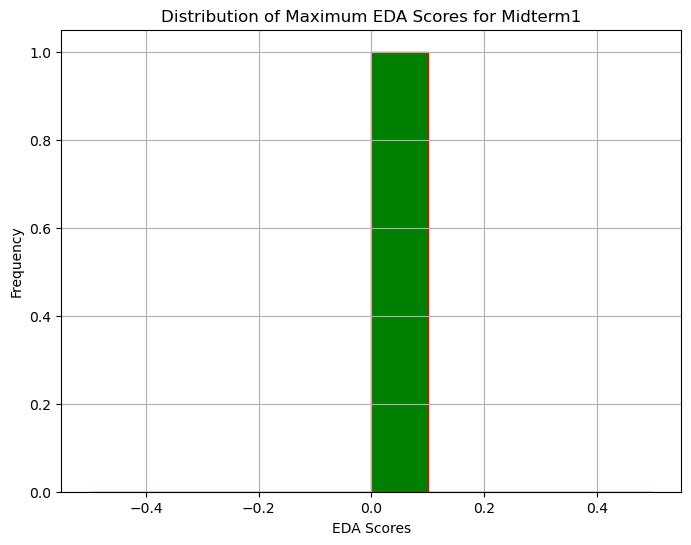

In [9]:
min_eda = eda['EDA'].min()

print("Minimum EDA score from the EDA :", min_eda)
plt.figure(figsize=(8, 6))
plt.hist(min_eda, bins=10, color='green', edgecolor='red')
plt.title('Distribution of Maximum EDA Scores for Midterm1')
plt.xlabel('EDA Scores')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Q6. Swarmplot a graph to show the distribution of score in the Midterm1 exam by gender

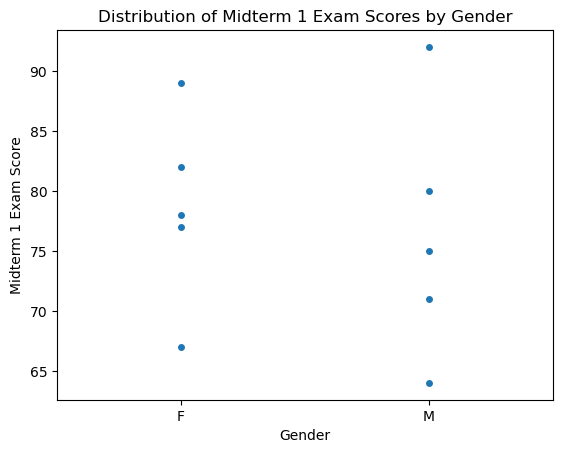

In [19]:
merged_data = pd.merge(grades, demography[['Student_id', 'Gender']], on='Student_id', how='left')

# Plotting the distribution of final exam scores by gender
sns.swarmplot(x='Gender', y='Midterm 1', data=merged_data)
plt.title('Distribution of Midterm 1 Exam Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Midterm 1 Exam Score')
plt.show()

# Q7. Find the highest HR of the student with lowest grading 


In [23]:
 #Question :  find the highest HR of the student with lowest grading 

# Bin creation and label declarations
bins = [0, 150, 175, 200]  
labels = ['C', 'B', 'A']

# Apply the binning to create a new column 'Grade_Category'
grades['Final Grades'] = pd.cut(grades['final'], bins=bins, labels=labels, right=False)

#Merge Demo and Grades sets
Student_demo_grade_df = pd.merge(demography[['Student_id', 'First Name', 'Last Name','DOB']],
                                 grades[['Student_id','final','Final Grades']],
                                 on='Student_id',
                                 how='inner')

#Merge Hr and  Grade data frames
Student_HR_df = pd.merge(Student_demo_grade_df[['Student_id', 'First Name', 'Last Name','final','Final Grades']],
                        hr[['Student_id','HR',]],
                        on='Student_id',
                        how='inner')
# applying Max aggregate  funtion 
max_hr_c_grade = Student_HR_df[Student_HR_df['Final Grades'] == 'C']['HR'].max() if 'C' in Student_HR_df['Final Grades'].values else None

# Display the result
if max_hr_c_grade is not None:
    print(f"The maximum value of 'HR' for students with a 'C' grade is: {max_hr_c_grade}")
else:
    print("No students with a 'C' grade found.")



The maximum value of 'HR' for students with a 'C' grade is: 199.278


# Q8. Display full name of Student who are born in year '2008'

In [25]:
demography['DOB'] = pd.to_datetime(demography['DOB'])

born_2008 = demography[demography['DOB'].dt.year == 2008]

full_names_2008 = born_2008['First Name'] + ' ' + born_2008['Last Name']

print("Full names of students born in the year 2008:")
print(full_names_2008)

Full names of students born in the year 2008:
5    Pat Murray
dtype: object


# Q9. What is the average score for each race on the midterm 2

In [37]:
merged_data = pd.merge(demography, grades, on='Student_id')
average_scores_by_race = merged_data.groupby('Race')['Midterm 2'].mean()
print(average_scores_by_race)

Race
African    58.0
Asian      83.5
Spanish    64.0
White      73.5
Name: Midterm 2, dtype: float64


# Q10. Identify students with the highest and lowest academic performance.

In [44]:
grades['Composite_Score'] = grades['Midterm 1'] + grades['Midterm 2'] + grades['final']

highest_performers = grades.nlargest(3, 'Composite_Score')  
lowest_performers = grades.nsmallest(3, 'Composite_Score')  

print("Top Performers:")
print(highest_performers[['Student_id', 'Composite_Score']])

print("\nBottom Performers:")
print(lowest_performers[['Student_id', 'Composite_Score']])

Top Performers:
  Student_id  Composite_Score
7        S08              364
2        S03              355
1        S02              347

Bottom Performers:
  Student_id  Composite_Score
6        S07              207
8        S09              245
9        S10              269


# Q11. Are there differences in body temperature based on gender or race?

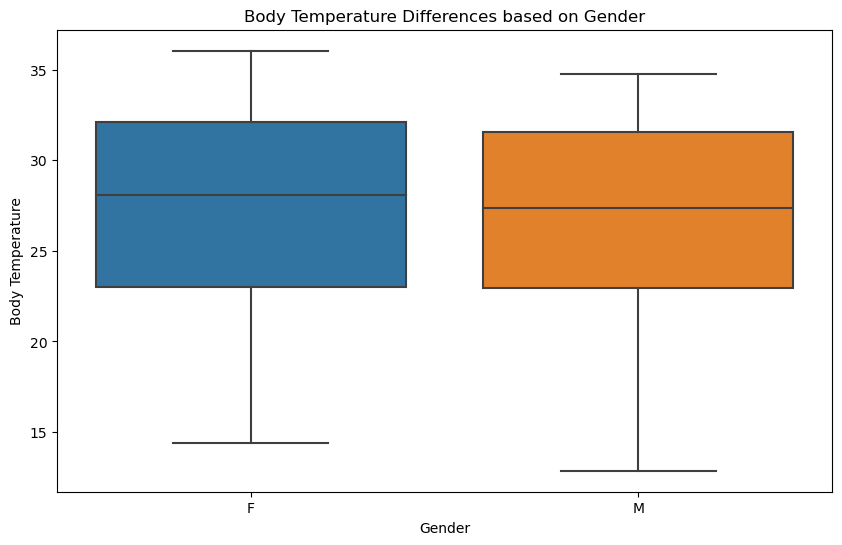

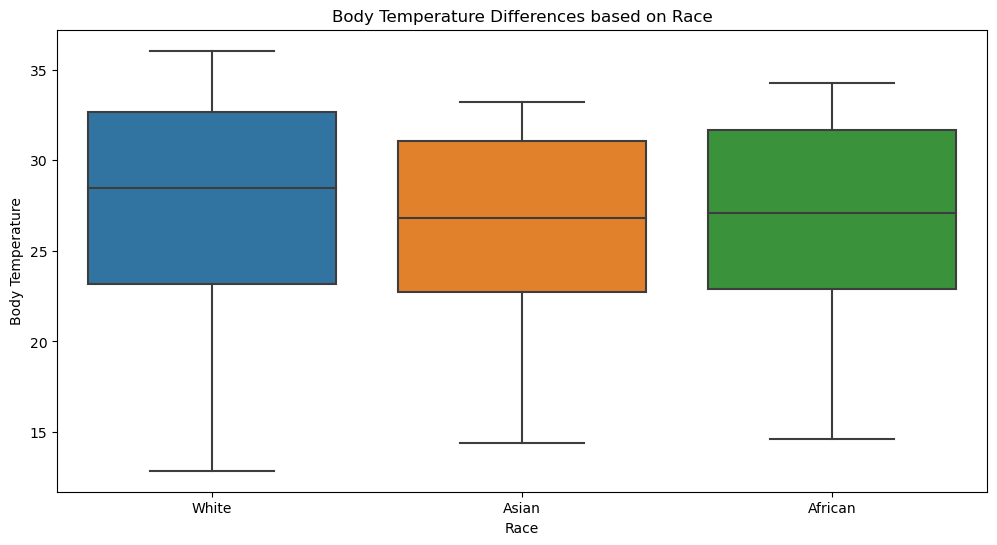

In [46]:
merged_temp_df = pd.merge(temp, demography[['Student_id', 'Gender', 'Race']], on='Student_id')
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='TEMP', data=merged_temp_df)
plt.xlabel('Gender')
plt.ylabel('Body Temperature')
plt.title('Body Temperature Differences based on Gender')
plt.show()


plt.figure(figsize=(12, 6))
sns.boxplot(x='Race', y='TEMP', data=merged_temp_df)
plt.xlabel('Race')
plt.ylabel('Body Temperature')
plt.title('Body Temperature Differences based on Race')
plt.show()

# Q12.How does body temperature change during exams, and is there a correlation with stress levels?

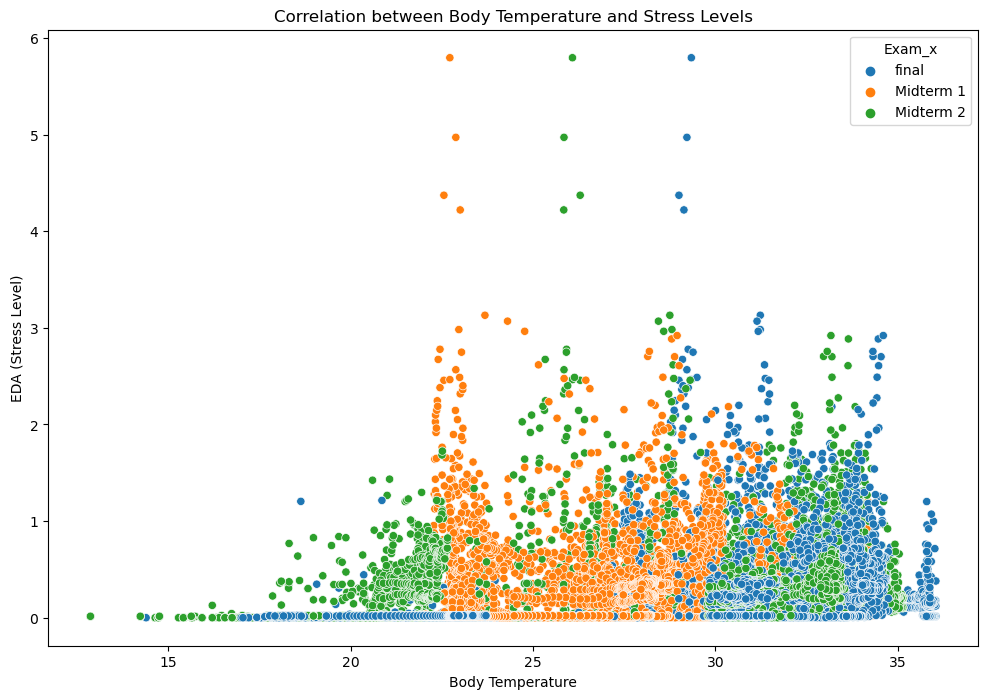

In [47]:
merged_df = pd.merge(temp, eda, on=['Student_id', 'Time in mins'])
plt.figure(figsize=(12, 8))
sns.scatterplot(x='TEMP', y='EDA', data=merged_df, hue='Exam_x')
plt.xlabel('Body Temperature')
plt.ylabel('EDA (Stress Level)')
plt.title('Correlation between Body Temperature and Stress Levels')
plt.show()

# Q13. What is the distribution of students across different demographic categories (gender, race)?

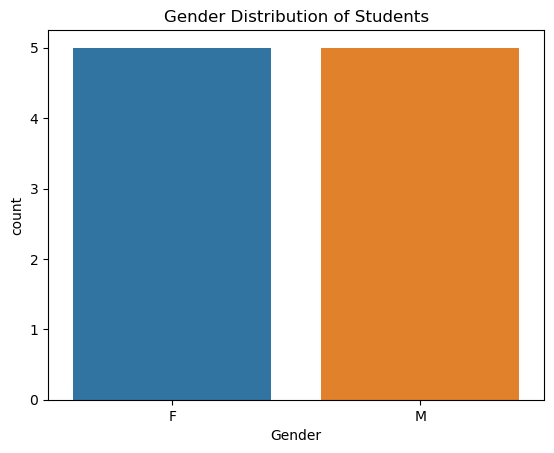

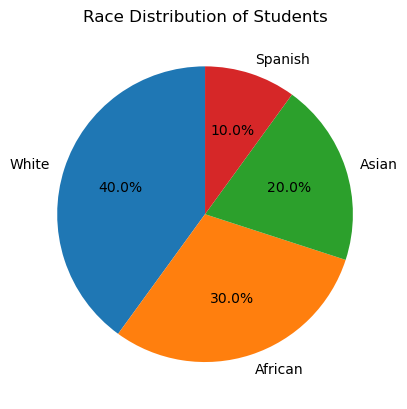

In [7]:
# Example bar plot for gender distribution
sns.countplot(x='Gender', data=demography)
plt.title('Gender Distribution of Students')
plt.show()

# Example pie chart for race distribution
race_counts = demography['Race'].value_counts()
plt.pie(race_counts, labels=race_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Race Distribution of Students')
plt.show()

# Q14.Is there any correlation between demographic factors (gender, race) and academic performance (grades)?

C:\Users\devad\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


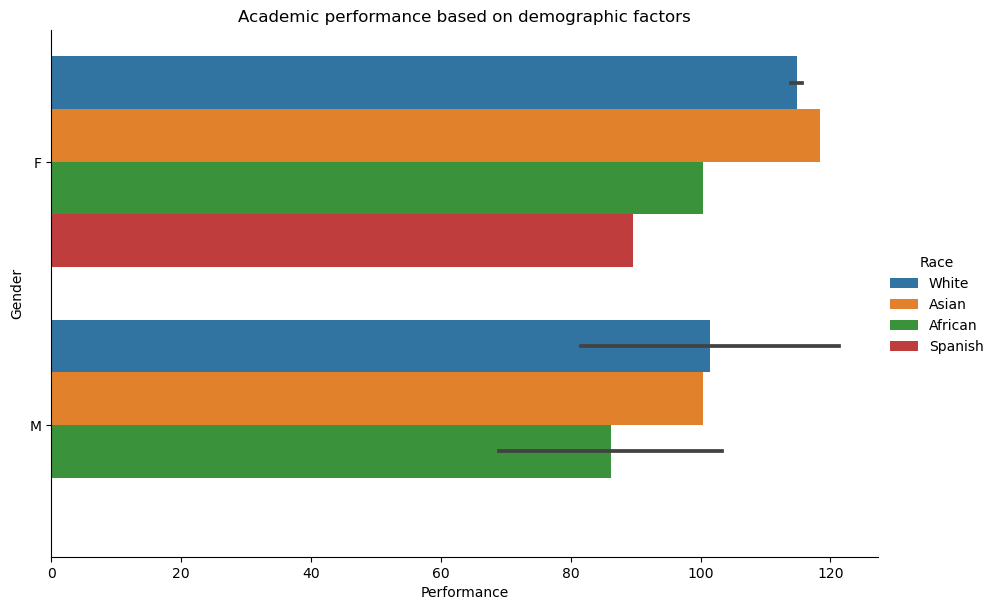

In [8]:
grades['Performance'] = grades[['Midterm 1', 'Midterm 2', 'final']].mean(axis=1)
merged_df = pd.merge(grades, demography, on='Student_id')

sns.catplot(x='Performance', y='Gender', hue='Race', data=merged_df, kind='bar', height=6, aspect=1.5)
plt.title('Academic performance based on demographic factors')
plt.show()

# Q15. Are there noticeable trends in performance based on demographic attributes?

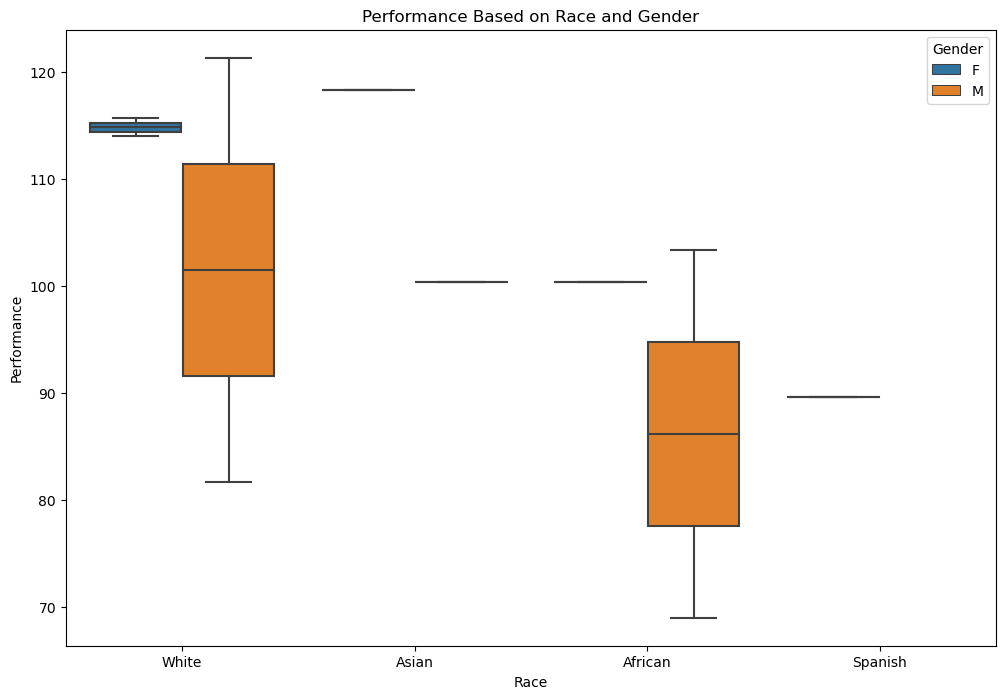

In [9]:
grades['Performance'] = grades[['Midterm 1', 'Midterm 2', 'final']].mean(axis=1)
merged_df = pd.merge(grades, demography, on='Student_id')

plt.figure(figsize=(12, 8))
sns.boxplot(x='Race', y='Performance', hue='Gender', data=merged_df)
plt.title('Performance Based on Race and Gender')
plt.show()